----

# **K-NN For Anomaly Detection**

## **Author**   :  **Muhammad Adil Naeem**

## **Contact**   :   **madilnaeem0@gmail.com**
<br>

----

### **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

### **Load dataset**

In [4]:
df = sns.load_dataset('iris')

### **We will only use Sepal Length and Sepal Width**

In [5]:
df = df[['sepal_length', 'sepal_width']]

### **Plot Scatter Plot**

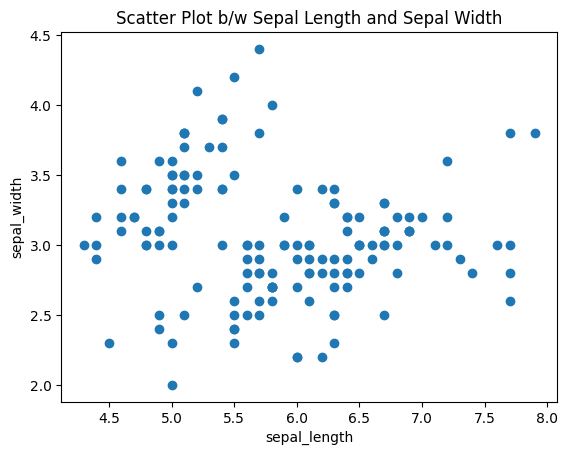

In [6]:
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.title('Scatter Plot b/w Sepal Length and Sepal Width')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

### **Try Knn to Detect Anomaly**

In [7]:
X = df.values
nbrs = NearestNeighbors(n_neighbors=3)
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

### **Calculate Distances and Indices with Knn**

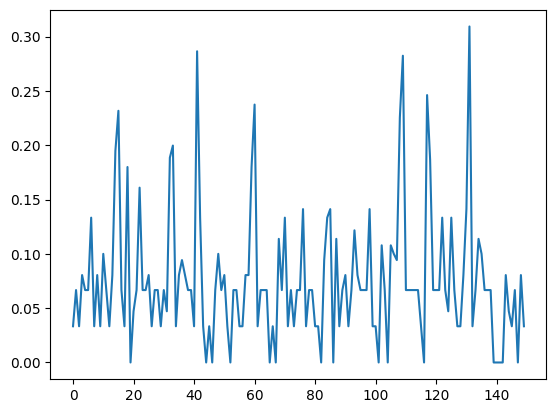

In [9]:
distances, indices = nbrs.kneighbors(X)
plt.plot(distances.mean(axis=1))
plt.show()

- The Point Above `0.15` is considered Anomaly.

In [10]:
outlier_index = np.where(distances.mean(axis=1) > 0.15)[0]
outlier_index

array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
       131])

- **These are the arrays which have anomaly.**

In [12]:
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


### **Let's Highlight Those points which are Anomalies**

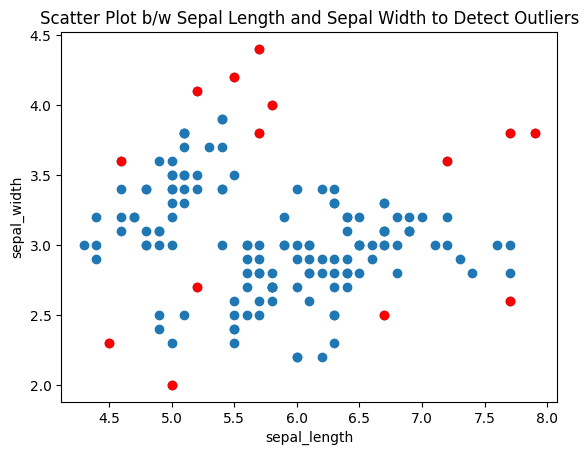

In [14]:
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.scatter(outlier_values['sepal_length'], outlier_values['sepal_width'], color='red')
plt.title('Scatter Plot b/w Sepal Length and Sepal Width to Detect Outliers')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()